# Calibrate Magneto

Source:
https://appelsiini.net/2018/calibrate-magnetometer/

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lock_meas  = '..\\..\\DATA\\RAW\\Measure_03\\Complex' # Location folder of the measurement files
rotate_date= '2018_ 11_ 26_12_08_52_'                 # Use this file to calibraet MAGNETO

# Load the Magneto calibration file.
mag_calib = pd.read_csv(lock_meas + '\\Rotation\\' + rotate_date + 'IMU.txt',
                               sep='\t',
                               decimal=',',
                               names=['time', 'acc0', 'acc1', 'acc2', 'gyro0', 'gyro1', 'gyro2', 'mag0', 'mag1', 'mag2'])

# Create a look up table to see the code more clearly
mag0=7
mag1=8
mag2=9
# Make array from data frame
mag_ar = np.array(mag_calib)

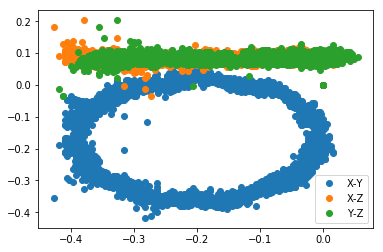

In [3]:
# Plotting the raw data. Without calibration
plt.plot(mag_ar[:,mag0], mag_ar[:,mag1], 'o', linestyle="", label="X-Y")
plt.plot(mag_ar[:,mag0], mag_ar[:,mag2], 'o', linestyle="", label="X-Z")
plt.plot(mag_ar[:,mag1], mag_ar[:,mag2], 'o', linestyle="", label="Y-Z")
plt.legend()
plt.show()

In [4]:
# Hard iron distorsion compensation (constant offset elimination)
mag0_off = (mag_ar[:,mag0].max()+mag_ar[:,mag0].min())/2
mag1_off = (mag_ar[:,mag1].max()+mag_ar[:,mag1].min())/2
mag2_off = (mag_ar[:,mag2].max()+mag_ar[:,mag2].min())/2

# Soft iron distorsion compensation
mag0_d = (mag_ar[:,mag0].max() - mag_ar[:,mag0].min())/2
mag1_d = (mag_ar[:,mag1].max() - mag_ar[:,mag1].min())/2
mag2_d = (mag_ar[:,mag2].max() - mag_ar[:,mag2].min())/2

for i in range(mag_ar.shape[0]):
    mag_ar[i, mag0] = (mag_ar[i, mag0] - mag0_off) / mag0_d
    mag_ar[i, mag1] = (mag_ar[i, mag1] - mag1_off) / mag1_d
    mag_ar[i, mag2] = (mag_ar[i, mag2] - mag2_off) / mag2_d

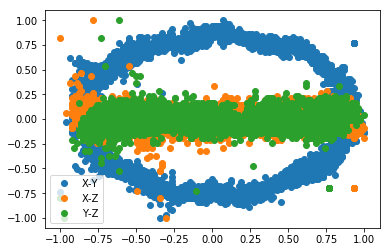

In [5]:
plt.plot(mag_ar[:,mag0], mag_ar[:,mag1], 'o', linestyle="", label="X-Y")
plt.plot(mag_ar[:,mag0], mag_ar[:,mag2], 'o', linestyle="", label="X-Z")
plt.plot(mag_ar[:,mag1], mag_ar[:,mag2], 'o', linestyle="", label="Y-Z")
plt.legend()
plt.show()